In [1]:
import yfinance as yf
import pandas as pd

ticker = 'MSFT'
data = yf.download(ticker, start='2020-01-01', end='2025-05-20')
data.dropna(inplace=True)
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,153.042297,153.147108,150.860341,151.289108,22622100
2020-01-03,151.136642,152.403898,150.603064,150.850807,21116200
2020-01-06,151.527283,151.593987,149.126167,149.669283,20813700
2020-01-07,150.145737,152.137132,149.898008,151.803653,21634100
2020-01-08,152.537292,153.213803,150.498254,151.432015,27746500


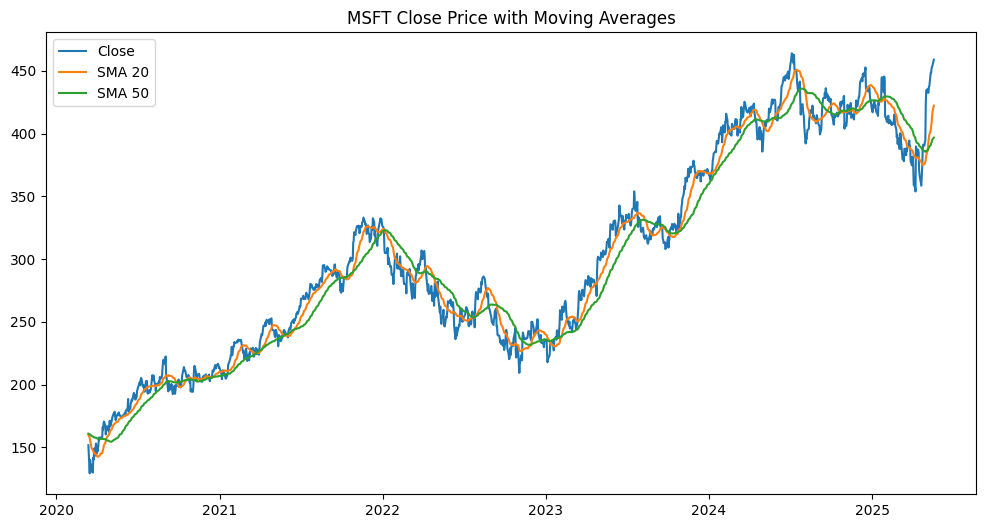

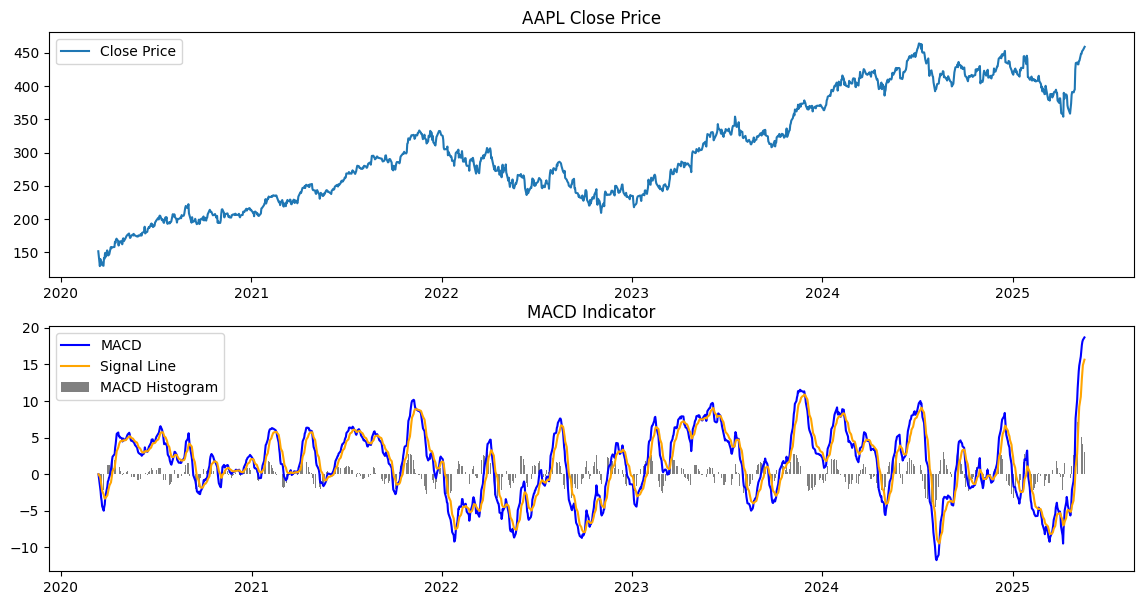

In [ ]:
# Simple Moving Averages (SMA)
# creates a new column called SMA_20 that stores the SMA for a 20 and 50 
# day time frame using the daily closing price for each day 
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Relative Strength Index (RSI)
# RSI is a momentum indicator that shows how overbought/oversold a stock is 
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI_14'] = compute_rsi(data['Close'])
data['Daily_Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

# To graph later in model_training
data['Year'] = data.index.year

# Calculates the MACD (Moving Average Convergence Divergence)
def compute_macd(series, short_window=12, long_window=26, signal_window=9):
    # Calculate short-term and long-term EMAs (Exponential Moving Average)
    ema_short = series.ewm(span=short_window, adjust=False).mean()
    ema_long = series.ewm(span=long_window, adjust=False).mean()
    # MACD line is difference between short and long EMAs
    macd = ema_short - ema_long
    # Signal line is EMA of MACD line
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    # MACD histogram is difference between MACD line and signal line
    macd_hist = macd - signal
    return macd, signal, macd_hist

# Add the MACD column to data and drop the NaNs
data['MACD'], data['MACD_signal'], data['MACD_hist'] = compute_macd(data['Close'])
data.dropna(inplace=True)


# Write to CSV
data.to_csv('../data/processed_data.csv', index=False)

# Visualize 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close')
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['SMA_50'], label='SMA 50')
plt.title(f'{ticker} Close Price with Moving Averages')
plt.legend()
plt.show()

# Assuming you already added MACD columns to your data:
plt.figure(figsize=(14, 7))

# MACD plot
plt.subplot(2, 1, 2)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='Signal Line', color='orange')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='grey')
plt.title('MACD Indicator')
plt.legend()

plt.show()
